In [ ]:
import pandas as pd
import numpy as np

# Set the number of data points
num_records = 5000

# Define the relationships and generate data
np.random.seed(42)  # for reproducibility

data = {
    'Injection_Temperature': np.random.uniform(180, 250, num_records),
    'Injection_Pressure': np.random.uniform(80, 150, num_records),
    'Cycle_Time': np.random.uniform(15, 45, num_records),
    'Cooling_Time': np.random.uniform(8, 20, num_records),
    'Material_Viscosity': np.random.uniform(100, 400, num_records),
    'Ambient_Temperature': np.random.uniform(18, 28, num_records),
    'Machine_Age': np.random.randint(1, 16, num_records),
    'Operator_Experience': np.random.randint(1, 121, num_records),
    'Maintenance_Hours': np.random.randint(0, 201, num_records),
}

df = pd.DataFrame(data)

# Create the target variable 'Parts_Produced_Per_Hour' with defined relationships
df['Parts_Produced_Per_Hour'] = (
    1500  # Base production rate
    + 2.5 * (df['Injection_Temperature'] - 180)
    + 1.8 * (df['Injection_Pressure'] - 80)
    - 30 * (df['Cycle_Time'] - 15)
    - 15 * (df['Cooling_Time'] - 8)
    - 0.5 * (df['Material_Viscosity'] - 100)
    + 1.2 * (df['Operator_Experience'] - 1)
    - 2.0 * (df['Machine_Age'] - 1)
    - 0.8 * (df['Maintenance_Hours'])
    + np.random.normal(0, 50, num_records)  # Adding some random noise
)

# Ensure the target variable is non-negative
df['Parts_Produced_Per_Hour'] = df['Parts_Produced_Per_Hour'].clip(lower=0)
df['Parts_Produced_Per_Hour'] = df['Parts_Produced_Per_Hour'].astype(int)


# Save the dataset to a CSV file
df.to_csv('manufacturing_data.csv', index=False)

print("Dataset generated and saved as 'manufacturing_data.csv'")
print(df.head())

Dataset generated and saved as 'manufacturing_data.csv'
   Injection_Temperature  Injection_Pressure  Cycle_Time  Cooling_Time  \
0             206.217808          107.554486   26.209225     13.996043   
1             246.550001          113.140496   24.987363     16.960961   
2             231.239576          139.818318   20.284617     14.752001   
3             221.906094          103.800307   33.218000      8.999631   
4             190.921305          140.875478   29.298725     10.226963   

   Material_Viscosity  Ambient_Temperature  Machine_Age  Operator_Experience  \
0          318.999493            18.923708           13                   56   
1          155.353599            18.607537           11                   89   
2          203.991908            24.041920            6                   91   
3          298.984191            27.661163            1                   70   
4          244.626803            23.027213            6                   87   

   Maintenance_Hou

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('manufacturing_data.csv')

# Display basic information
print("Dataset Shape:")
print(df.shape)
print("\nData Types:")
print(df.dtypes)

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape:
(5000, 10)

Data Types:
Injection_Temperature      float64
Injection_Pressure         float64
Cycle_Time                 float64
Cooling_Time               float64
Material_Viscosity         float64
Ambient_Temperature        float64
Machine_Age                  int64
Operator_Experience          int64
Maintenance_Hours            int64
Parts_Produced_Per_Hour      int64
dtype: object

Summary Statistics:
       Injection_Temperature  Injection_Pressure   Cycle_Time  Cooling_Time  \
count            5000.000000         5000.000000  5000.000000   5000.000000   
mean              214.778239          114.404099    30.041252     14.092216   
std                20.274356           19.993156     8.723095      3.453675   
min               180.000814           80.003698    15.004732      8.003029   
25%               197.070396           97.300214    22.415020     11.152751   
50%               215.000604          114.018010    29.885914     14.149396   
75%               232.3

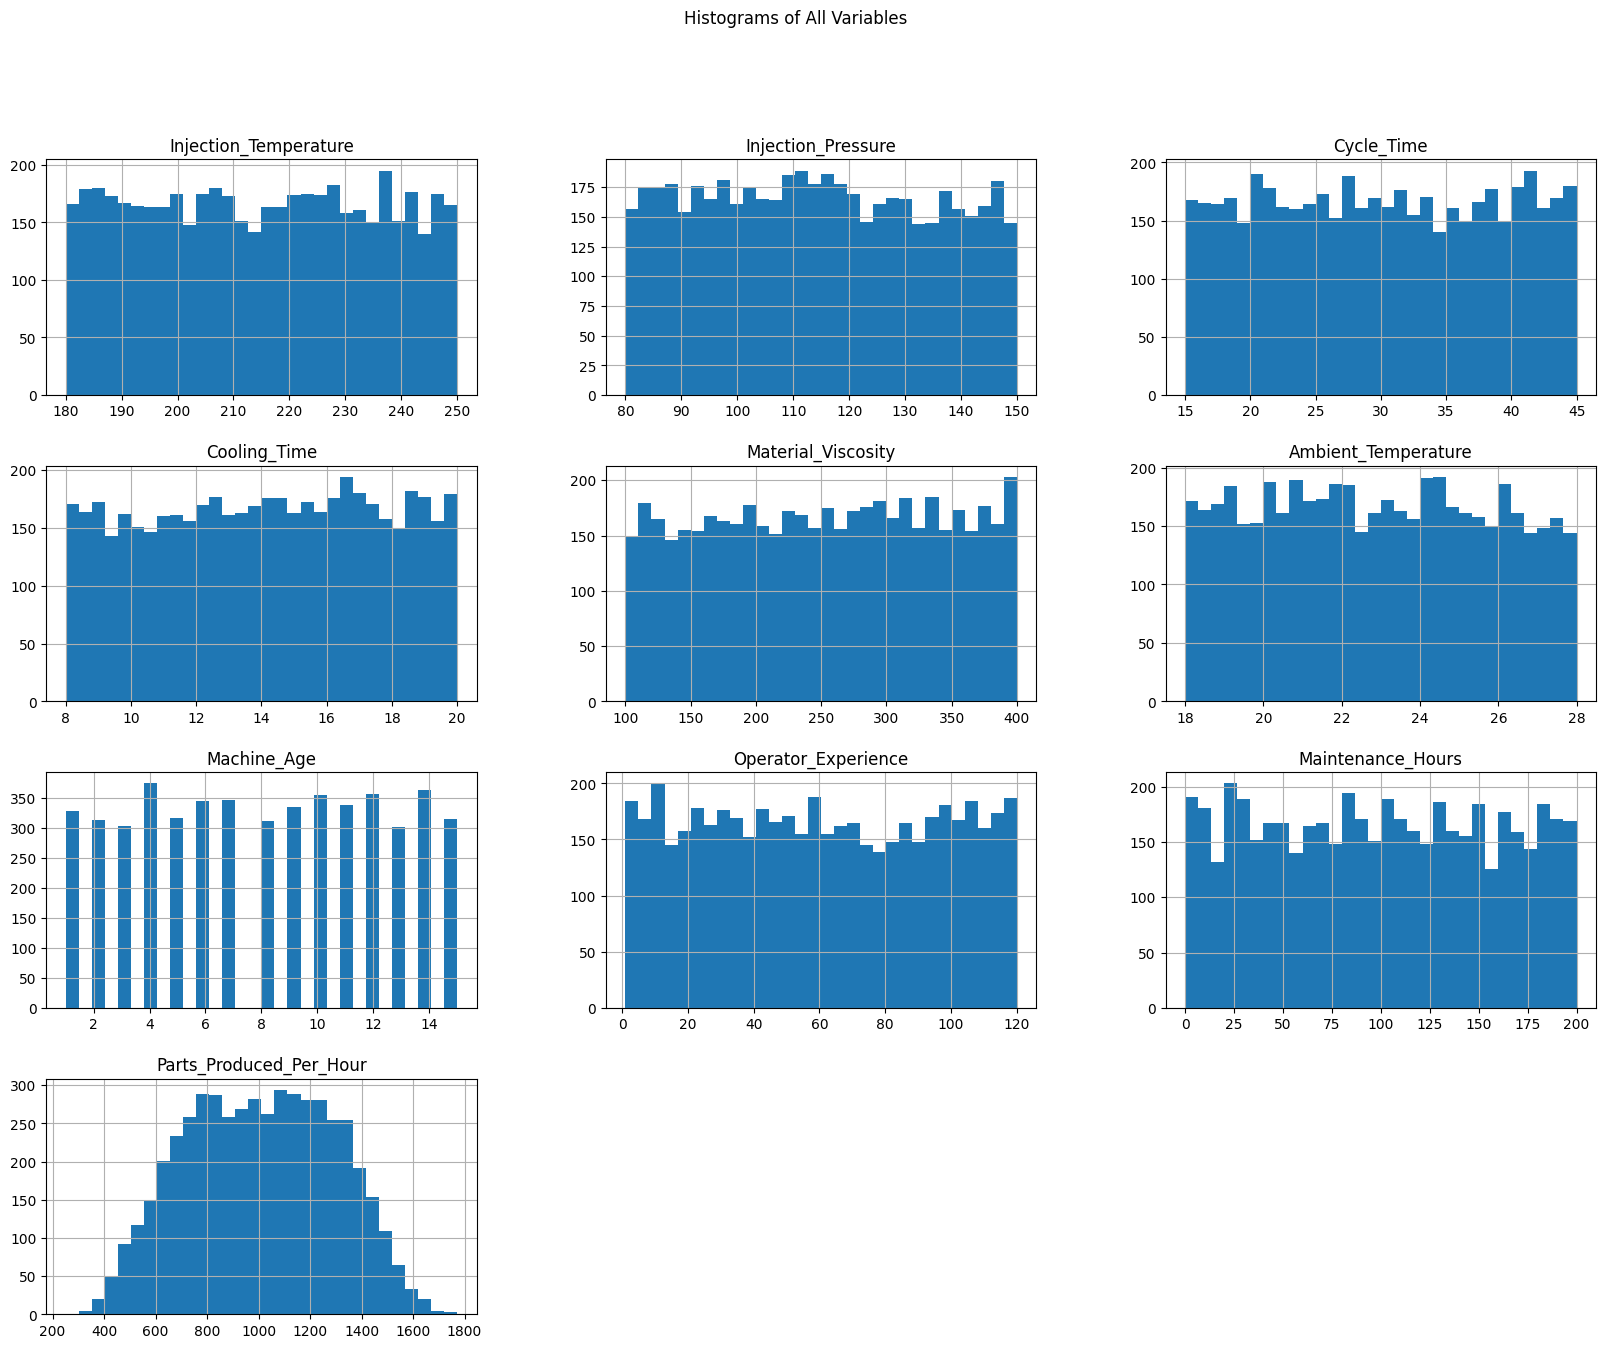

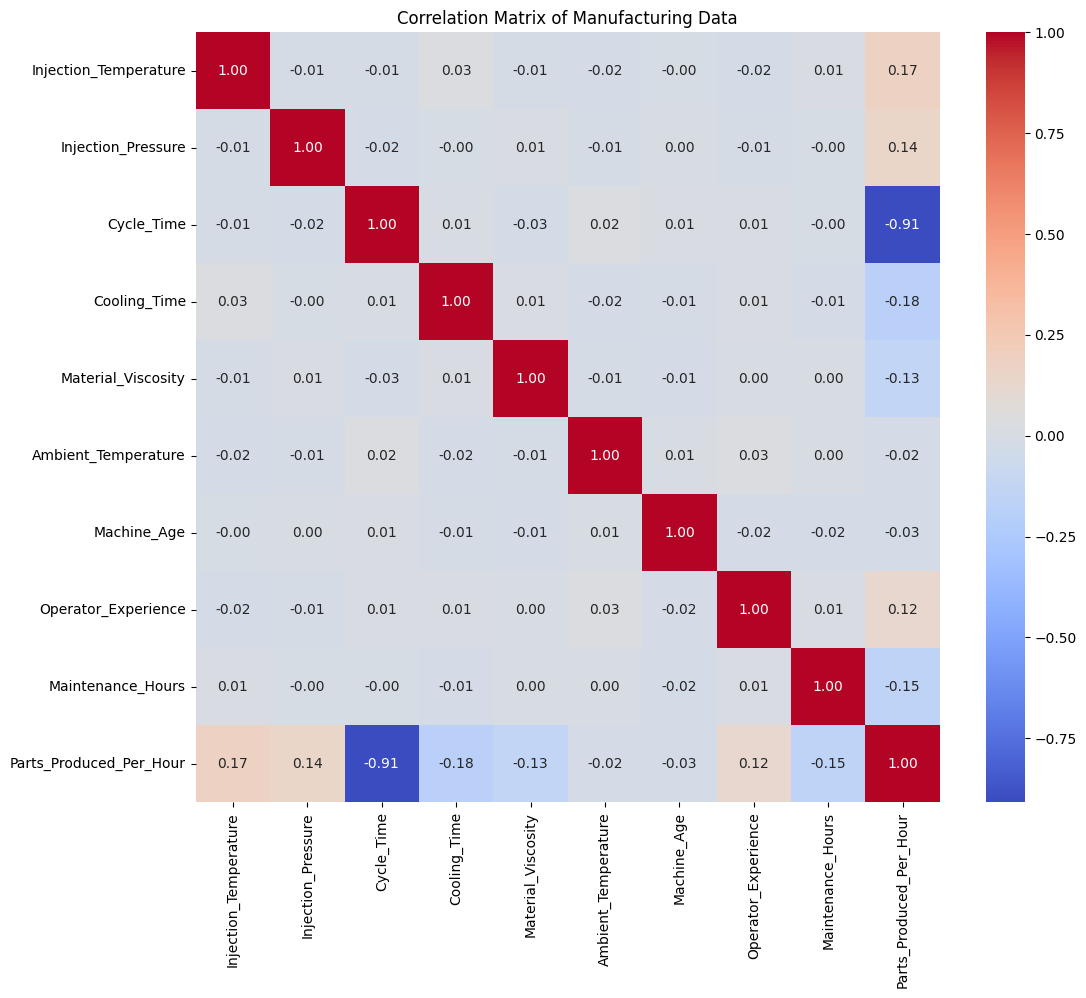

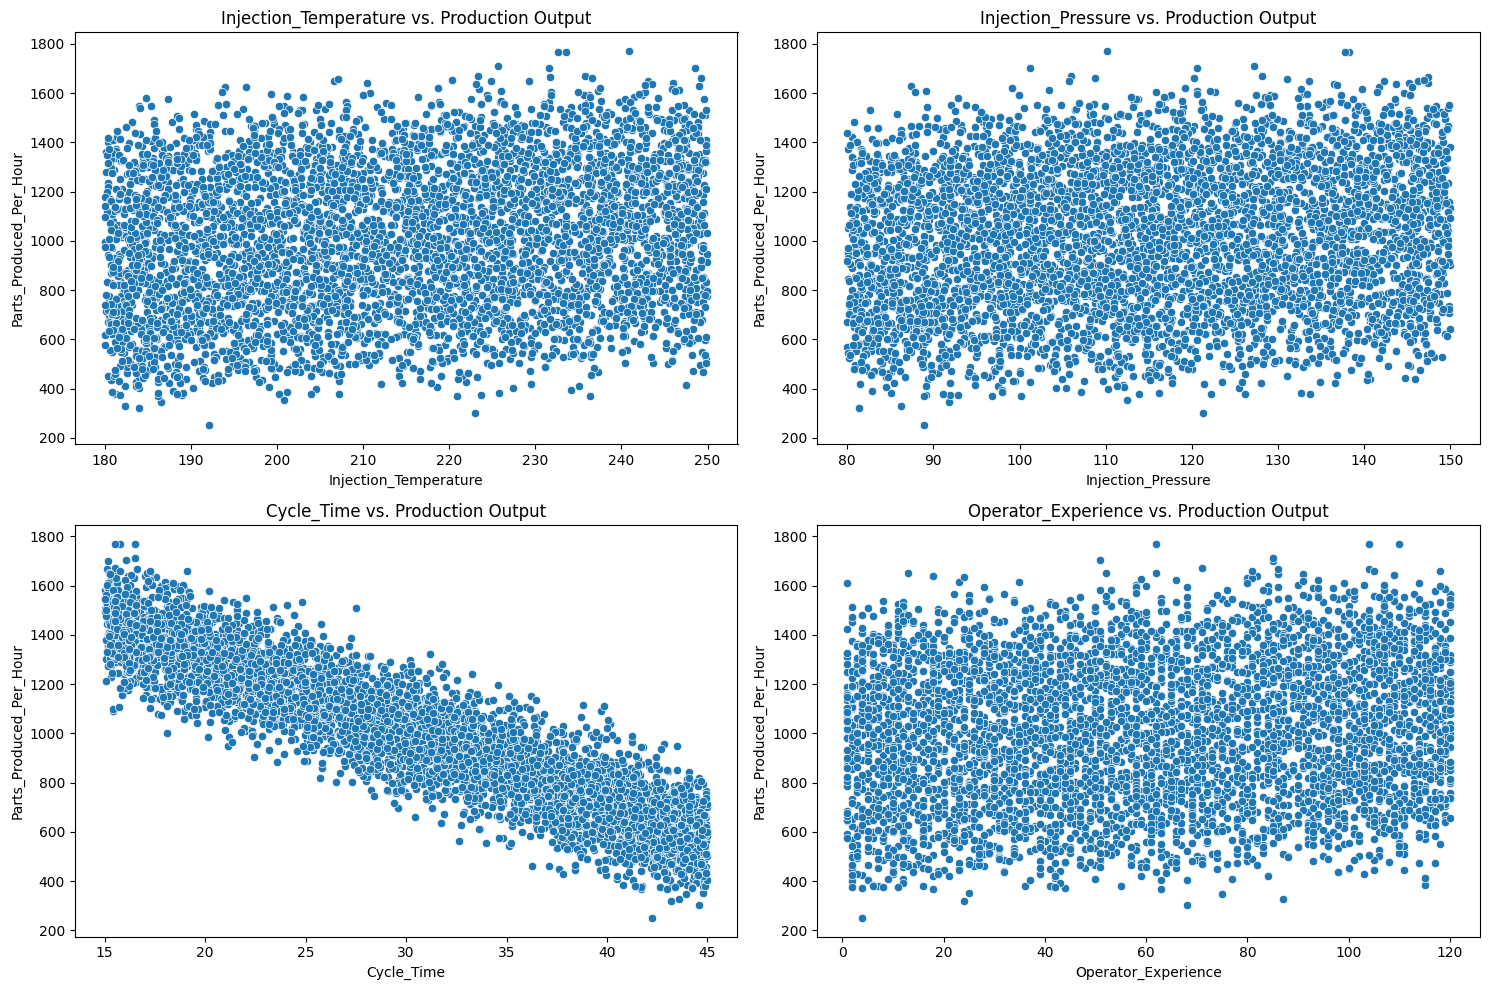

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('manufacturing_data.csv')

# Histograms for all variables
df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of All Variables")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Manufacturing Data")
plt.show()

# Scatter plots of key features vs. the target variable
features_to_plot = ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Operator_Experience']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=feature, y='Parts_Produced_Per_Hour')
    plt.title(f'{feature} vs. Production Output')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('manufacturing_data.csv')

# Outlier handling using the IQR method (optional, apply if significant outliers are found in EDA)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

# Define features (X) and target (y)
X = df_cleaned.drop('Parts_Produced_Per_Hour', axis=1)
y = df_cleaned['Parts_Produced_Per_Hour']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Original dataset shape: (5000, 10)
Cleaned dataset shape: (5000, 10)
Training set size: 4000
Testing set size: 1000


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

print("Model training complete.")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Model training complete.
Intercept: 1526.1663629615343
Coefficients: [  2.48863867   1.80895292 -29.87686081 -15.01758264  -0.48940824
  -0.37191706  -1.68906319   1.20804289  -0.79339759]


R-squared (R²): 0.9694
Mean Squared Error (MSE): 2634.2023
Root Mean Squared Error (RMSE): 51.3245
Mean Absolute Error (MAE): 40.8052


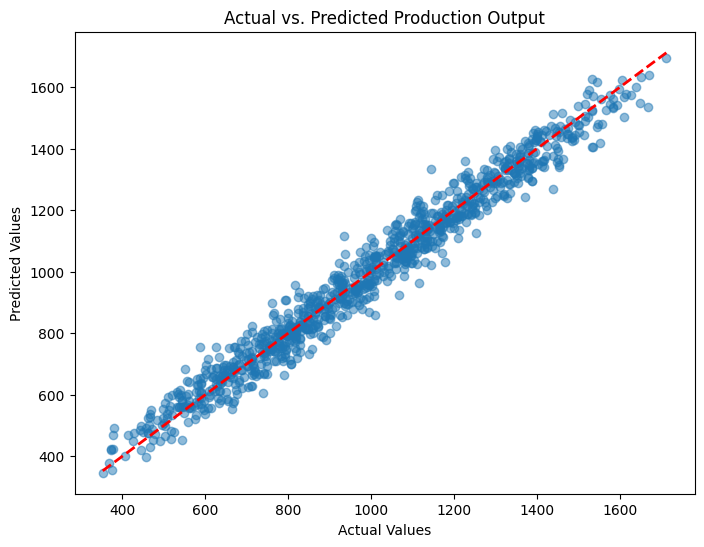

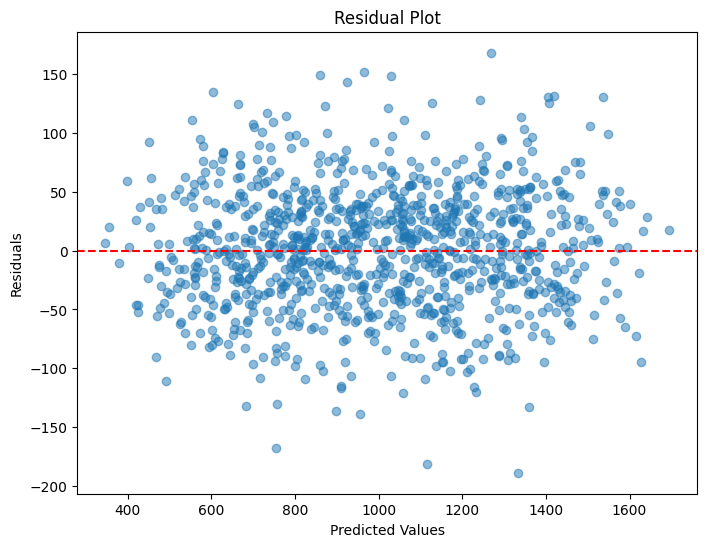

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Plot Predicted vs. Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Production Output")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
import pickle

# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'linear_regression_model.pkl'")

Model saved as 'linear_regression_model.pkl'


In [ ]:
# main.py
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import pandas as pd

app = FastAPI()

# Load the model
with open('linear_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

class MachineInput(BaseModel):
    Injection_Temperature: float
    Injection_Pressure: float
    Cycle_Time: float
    Cooling_Time: float
    Material_Viscosity: float
    Ambient_Temperature: float
    Machine_Age: int
    Operator_Experience: int
    Maintenance_Hours: int

@app.post('/predict')
def predict_output(data: MachineInput):
    input_data = pd.DataFrame([data.dict()])
    prediction = model.predict(input_data)[0]
    return {'predicted_output': prediction}